In [598]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import optimize
import pandas as pd
import os
from math import *

In [599]:
def assigned_fun(x):
    return sin(2*pi*x)+tanh(2*pi*x)

In [600]:
df=pd.DataFrame([])
X=np.random.random(100)
assigned_fun_v=np.vectorize(assigned_fun)
T=assigned_fun_v(X)
y=T+np.random.randn(T.size)*0.2

In [601]:
#Dividing the data set as 80:20 (train:test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Text(0, 0.5, 'y')

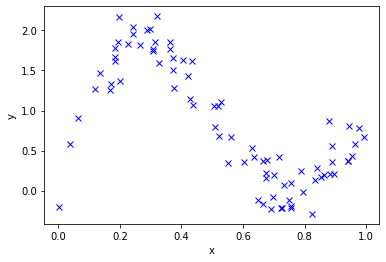

In [602]:
plt.plot(X_train,y_train,'bx')
plt.xlabel('x')
plt.ylabel('y')

In [603]:
def X_attributes_fun(x,m):
    X_attributes=np.zeros((x.size,m+1))
    for i in range(m+1):
        X_attributes[:,i]=x**i
    return X_attributes
def J_fun(X_attributes,y,w,lam):
    err=y-(X_attributes @ w)
    J = 0.5*(err @ err + lam*((w[1:] @ w[1:])))
    J_der=np.zeros((w.size))
    J_der=(X_attributes.transpose() @ err) + lam*w
    J_der[0]-=lam*w[0]
    return J,J_der
def y_estimate_fun(x,w,m):
    X_attributes=X_attributes_fun(x,m)
    return X_attributes @ w

#Polynomial Regression
def poly_reg(x,y,m,lam):
    X_attributes=X_attributes_fun(x,m)
    w_o=np.zeros(m+1)
    def cost(w):return J_fun(X_attributes,y,w,lam)[0]
    def cost_der(w): return J_fun(X_attributes,y,w,lam)[1]
    wopt = optimize.minimize(cost,w_o,method='BFGS',options={'disp': False})
    return wopt.fun,wopt.x
def E_rms(x,w,lam):
    err=assigned_fun_v(x)-y_estimate_fun(x,w,w.size-1)
    ans=0.5((err @ err) + lam*(w @ w))
    return sqrt(2*ans/x.size)

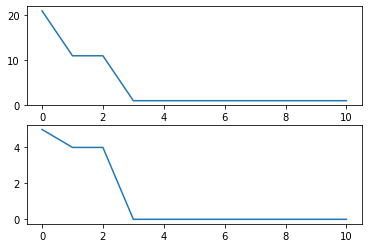

In [604]:
m=np.arange(11)
lam=0
#J_train_m=np.array([poly_reg(X_train,y_train,i,0)[1] for i in m])
J_train_m=np.zeros_like(m)
J_test_m=np.zeros_like(m)
for i in m:
    J_train_m[i],w_m=poly_reg(X_train,y_train,i,lam)
    X_attributes_m=X_attributes_fun(X_test,i)
    J_test_m[i]=J_fun(X_attributes_m,y_test,w_m,lam)[0]
fig, axes = plt.subplots(2,1)
axes[0].plot(m,J_train_m)
axes[1].plot(m,J_test_m)

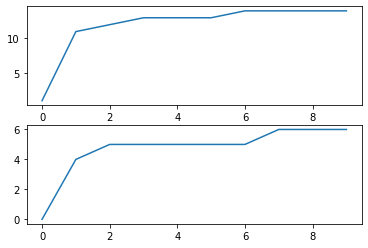

In [605]:
m=3
lam=np.arange(10)
#J_train_m=np.array([poly_reg(X_train,y_train,i,0)[1] for i in m])
J_train_lam=np.zeros_like(lam)
J_test_lam=np.zeros_like(lam)
for i in lam:
    J_train_lam[i],w_lam=poly_reg(X_train,y_train,m,i)
    X_attributes_lam=X_attributes_fun(X_test,m)
    J_test_lam[i]=J_fun(X_attributes_lam,y_test,w_lam,i)[0]
fig, axes = plt.subplots(2,1)
axes[0].plot(lam,J_train_lam)
axes[1].plot(lam,J_test_lam)

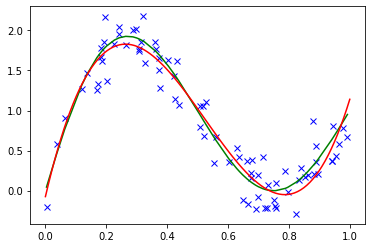

In [606]:
m=3;
lam=0;
j_t,w_t=poly_reg(X_train,y_train,m,lam)
plt.plot(X_train,y_train,'bx',np.sort(X_train),assigned_fun_v(np.sort(X_train)),'g-',
         np.linspace(0,1,100),y_estimate_fun(np.linspace(0,1,100),w_t,m),'r-')

In [607]:
s=10   #Data size
i_s=np.random.choice(range(X_train.size),s)
X_s=X_train[i_s]
y_s=y_train[i_s]

In [608]:
d=np.array([1,3,6,9])
j_ts=np.zeros_like(d)
w_ts=[np.zeros(i+1) for i in d]
for i in range(d.size):
     j_ts[i],w_ts[i]=poly_reg(X_s,y_s,d[i],0)

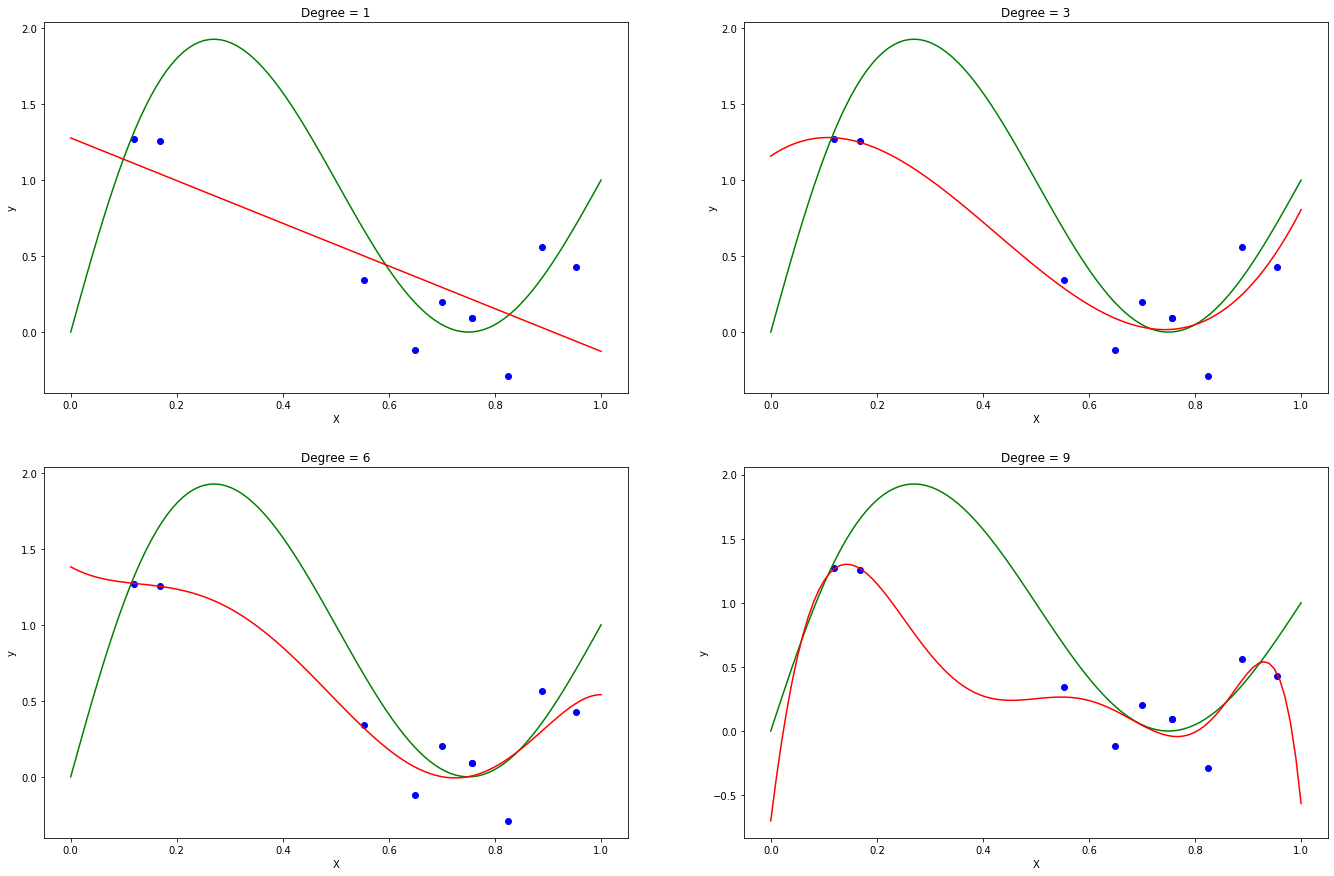

In [609]:
x_temp=np.linspace(0,1,100)
fig, axes = plt.subplots(2,2,figsize=(23,15))
for i,ax in enumerate(axes.flat):
    ax.plot(X_s,y_s,'bo',x_temp,assigned_fun_v(x_temp),'g-',x_temp,y_estimate_fun(x_temp,w_ts[i],d[i]),'r-')
    ax.set(xlabel='X',ylabel='y',title=('Degree = '+str(d[i])))

[Text(0, 0.5, 'y (xn,w)'),
 Text(0.5, 0, 't n'),
 Text(0.5, 1.0, 'Test scatter plot')]

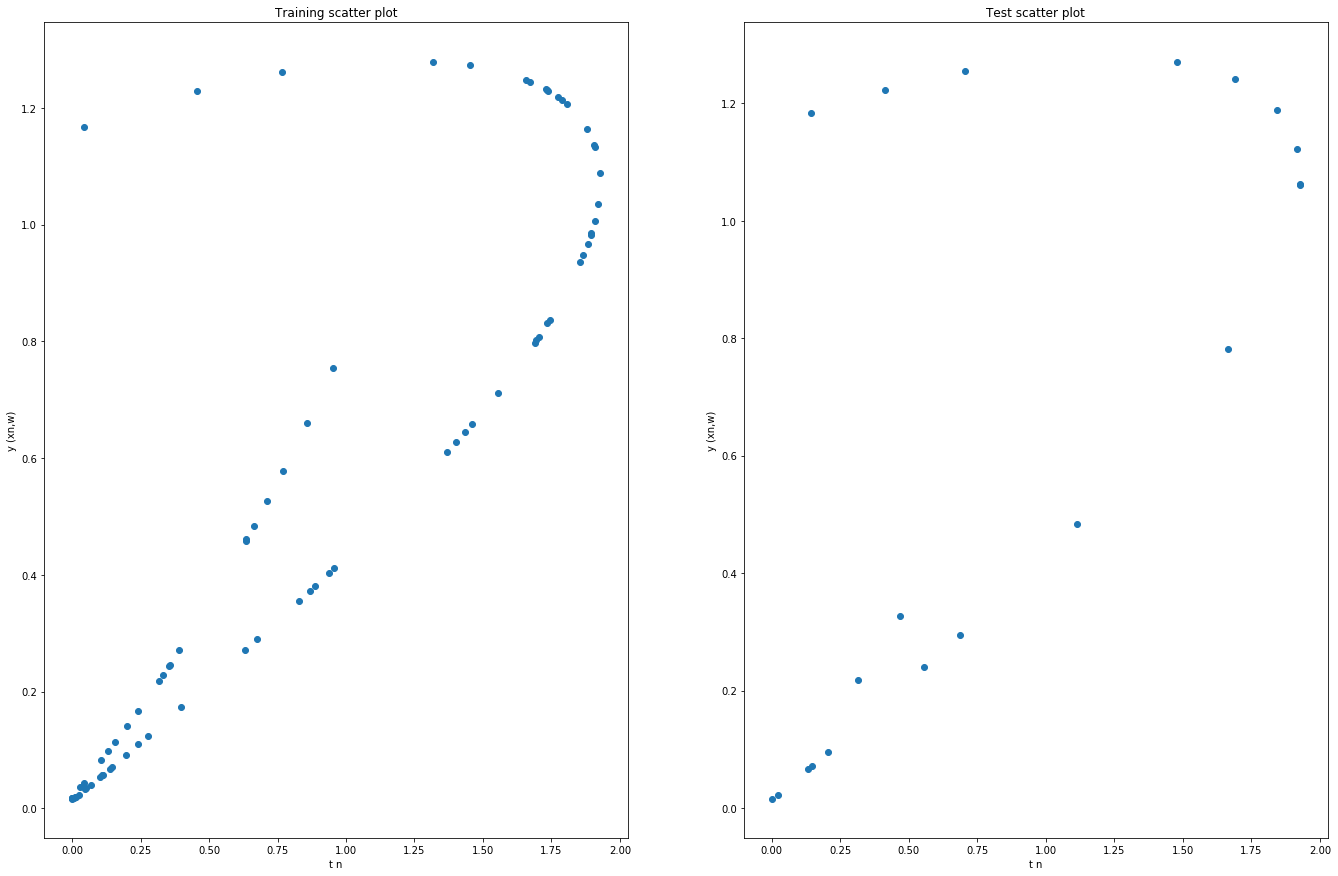

In [618]:
i_m=1
fig, axes = plt.subplots(1,2,figsize=(23,15))
axes[0].scatter(assigned_fun_v(X_train),y_estimate_fun(X_train,w_ts[i_m],d[i_m]))
axes[0].set(xlabel='t n',ylabel='y (xn,w)',title='Training scatter plot')
axes[1].scatter(assigned_fun_v(X_test),y_estimate_fun(X_test,w_ts[1],d[1]))
axes[1].set(xlabel='t n',ylabel='y (xn,w)',title='Test scatter plot')

In [621]:
M=np.arange(10)